In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, mean_squared_error, mean_absolute_error
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
import datetime
import joblib
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 1. Data Preprocessing

In [2]:
df = pd.read_excel('trainDataset.xls')
df.drop(labels=['ID'], axis=1, inplace=True)
df.drop(df[df.iloc[:, 0]==999].index, axis=0, inplace=True)
df.drop(df[df.iloc[:, 7]==999].index, axis=0, inplace=True) 
df.drop(df[df.iloc[:, 10]==999].index, axis=0, inplace=True)
df.rename(columns = {'pCR (outcome)':'PCR', 'RelapseFreeSurvival (outcome)':'RFS'}, inplace=True)
print(df.shape)
df.head()

(391, 119)


,PCR,RFS,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1,144.0,41.0,0,0.0,0.0,1.0,3,3,1,1,2,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,3.328814,0.725849,-0.425324,0.

In [3]:
df.describe()

,PCR,RFS,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,391.000000,391.000000,391.000000,391.000000,390.000000,390.000000,390.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,3.910000e+02,3.910000e+02,391.000000,391.000000,391.000000,3

In [4]:
df.dtypes[:12]

PCR                  int64
RFS                float64
Age                float64
ER                   int64
PgR                float64
HER2               float64
TrippleNegative    float64
ChemoGrade           int64
Proliferation        int64
HistologyType        int64
LNStatus             int64
TumourStage          int64
dtype: object

In [5]:
# change the data type of the columns
df = df.astype(float, copy=False)
df.dtypes[:12]

PCR                float64
RFS                float64
Age                float64
ER                 float64
PgR                float64
HER2               float64
TrippleNegative    float64
ChemoGrade         float64
Proliferation      float64
HistologyType      float64
LNStatus           float64
TumourStage        float64
dtype: object

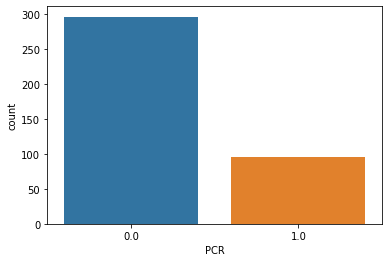

In [6]:
# data counplot 
sns.countplot(x=df.PCR, data=df)
plt.show()

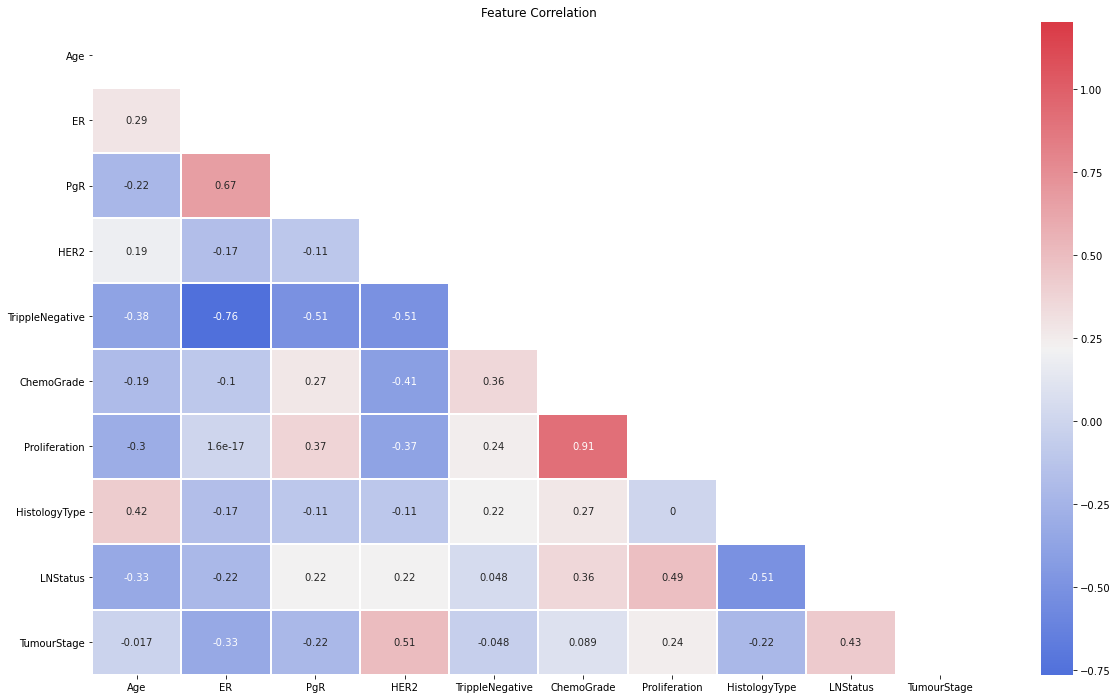

In [7]:
# correlation matrix
features = df.drop(['PCR', 'RFS'], axis=1, inplace=False).iloc[:10, :10]
corrMtrx = features.corr()
mask = np.zeros_like(corrMtrx)
mask[np.triu_indices_from(mask)] = True

fig, axs = plt.subplots(figsize=(20, 12))
plt.title('Feature Correlation')

cmap = sns.diverging_palette(260, 10, n=10, as_cmap=True)
sns.heatmap(corrMtrx, mask=mask, vmax=1.2, cmap=cmap, ax=axs, annot=True, fmt='0.2g', linewidths=1, square=False)
plt.show()

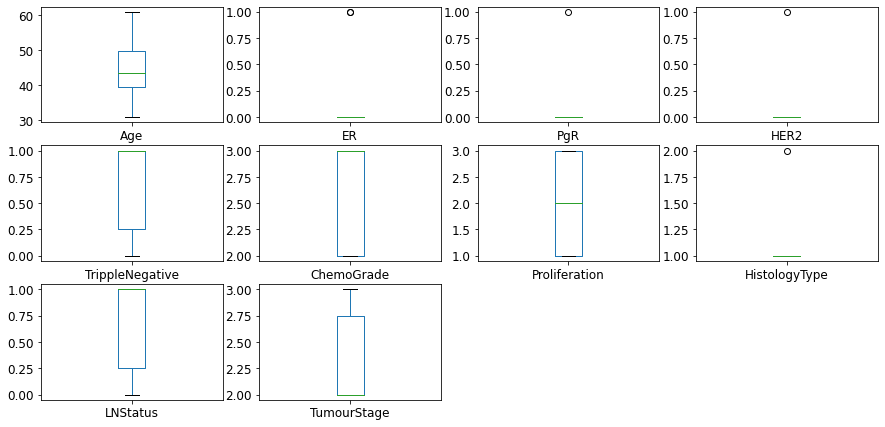

In [8]:
# box plot to check the value range and outliers of each feature
features.plot(kind='box', subplots=True, layout=(8,4), sharex=False, sharey=False, fontsize=12, figsize=(15,20))
plt.show()

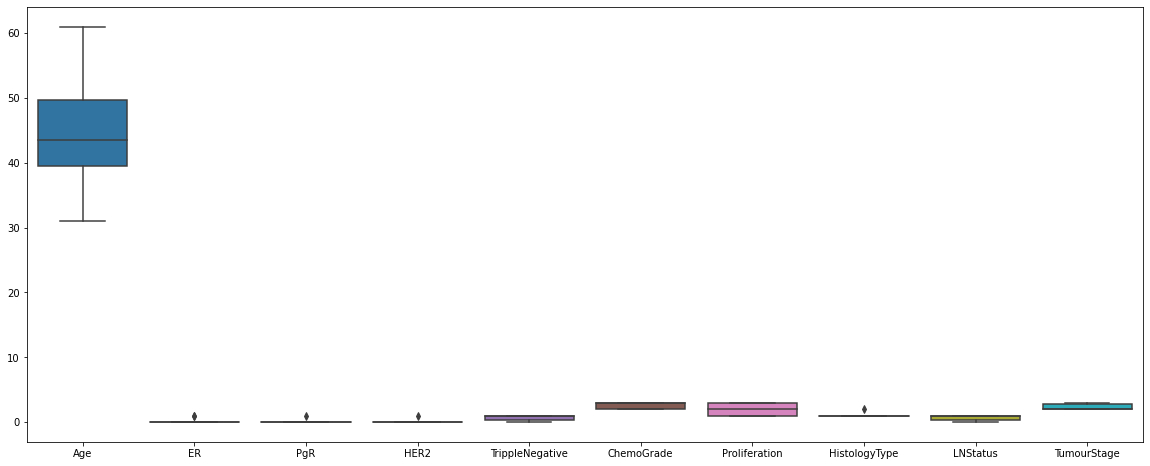

In [9]:
# Compare the features data ranges.
fig, ax = plt.subplots(1, figsize=(20, 8))
sns.boxplot(data=features, ax=ax)
plt.show()

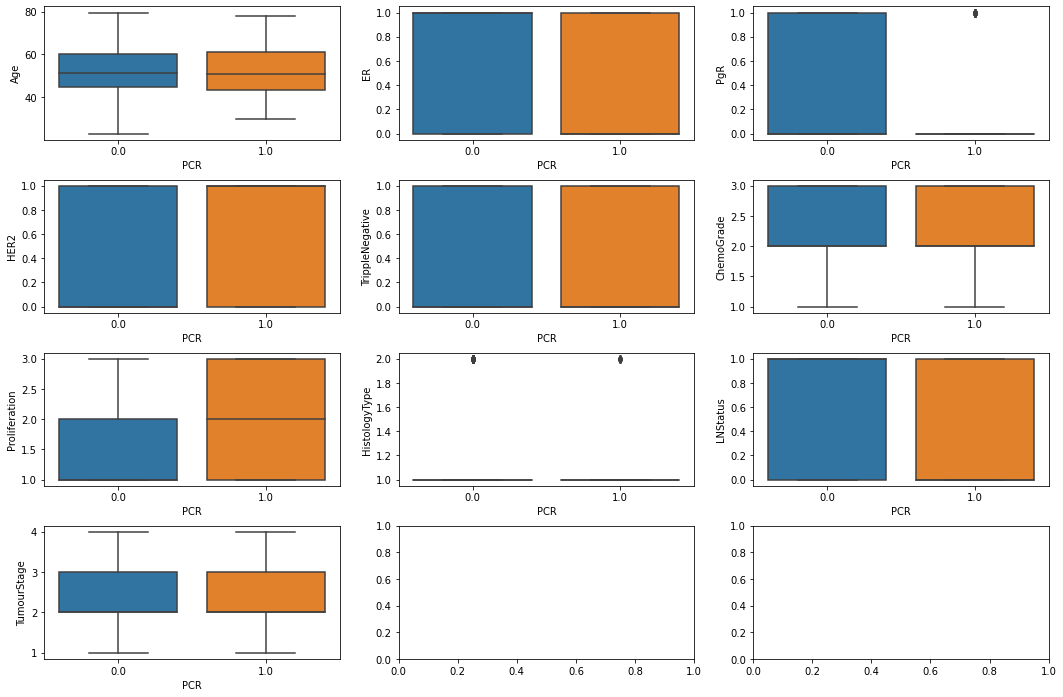

In [10]:
# Use boxplots to see if certain feature can discriminate between labels
fig, axs = plt.subplots(4, 3, figsize=(18, 12))
fig.subplots_adjust(hspace=0.3, wspace=0.2)
axs = axs.ravel()
for i, column in enumerate(df.columns[2:12]):
    sns.boxplot(x=df.PCR, y=df[column], ax=axs[i])

In [11]:
# check for missing values
print(df.columns[df.isna().any()].tolist())
# replace the missing values with 0
df.fillna(0, inplace=True)
print(df.columns[df.isna().any()].tolist())

df.iloc[280:290, :12]

['PgR', 'HER2', 'TrippleNegative']
[]


,PCR,RFS,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage
284,0.0,40.0,55.800137,1.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0
285,1.0,38.0,66.800000,1.0,0.0,0.0,0.0,3.0,3.0,1.0,0.0,2.0
286,0.0,39.0,45.385353,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,3.0
287,1.0,38.0,31.900000,0.0,0.0,0.0,1.0,3.0,2.0,1.0,1.0,3.0
288,0.0,38.0,59.100000,1.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,2.0
289,1.0,39.0,64.684463,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,3.0
290,0.0,38.0,67.000000,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0
291,1.0,37.0,51.000000,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0
292,0.0,98.0,64.000000,0.0,0.0,0.0,1.0,3.0,3.0,1.0,0.0,2.0
293,0.0,25.0,61.670089,0.0,0.0,0.0,1.0,2.0,1.0,2.0,1.0,2.0


In [12]:
# Removing duplicate columns
df = df.loc[:,~df.columns.duplicated()]
df.shape

(391, 119)

In [13]:
# Make a copy of the cleaned original dataset
X = df.drop(['PCR', 'RFS'], axis=1, inplace=False)
y = df[['PCR', 'RFS']]
y.head()

,PCR,RFS
0,1.0,144.0
1,0.0,142.0
2,1.0,135.0
3,0.0,12.0
4,0.0,109.0


In [14]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}, y_train shape: {y_train.shape}, y_test shape: {y_test.shape}')

X_train shape: (312, 117), X_test shape: (79, 117), y_train shape: (312, 2), y_test shape: (79, 2)


In [15]:
# Data Standardization
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
print(f'X_train_sc shape: {X_train_sc.shape}, X_test_sc shape: {X_test_sc.shape}')

X_train_sc shape: (312, 117), X_test_sc shape: (79, 117)


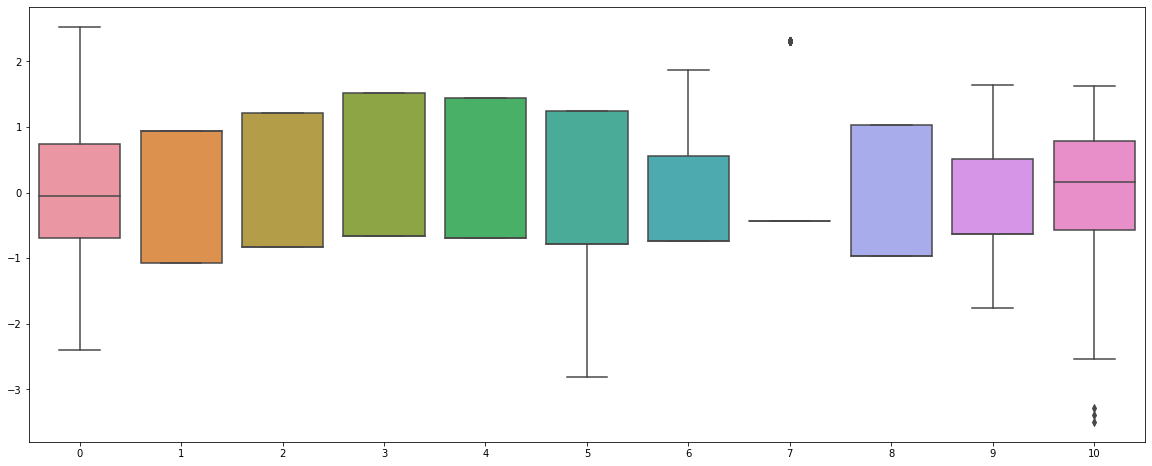

In [16]:
# plot data distribution after standardization
fig, ax = plt.subplots(1, figsize=(20, 8))
sns.boxplot(data=X_train_sc[:,:11], ax=ax)
plt.show()

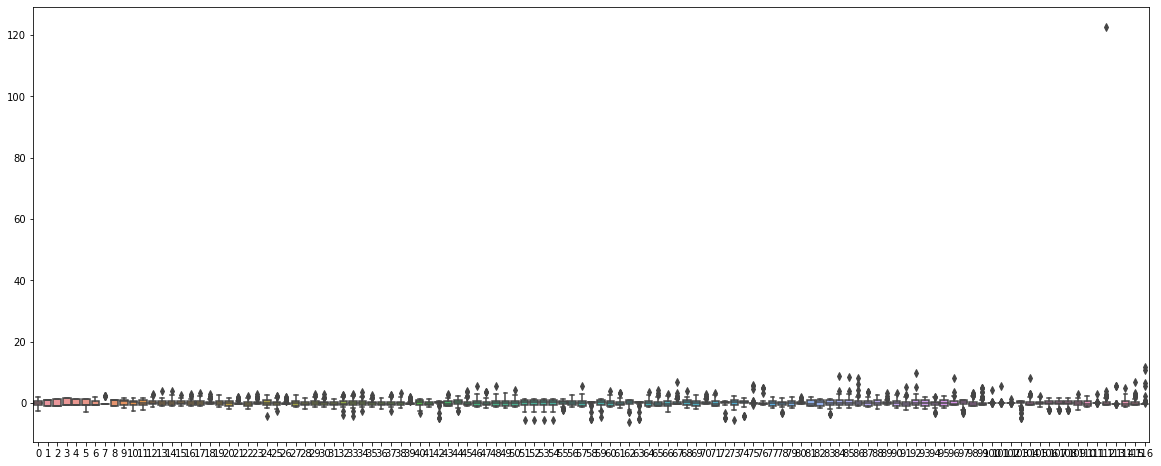

In [17]:
fig, ax = plt.subplots(1, figsize=(20, 8))
sns.boxplot(data=X_test_sc, ax=ax)
plt.show()

## Feature Selection methods

In [18]:
# removing constant features
from sklearn.feature_selection import VarianceThreshold
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
sel = VarianceThreshold(threshold=0)
X_train_fs = sel.fit_transform(X_train_df)
X_test_fs = sel.transform(X_test_df)
columns = X_train_df.columns[sel.get_support()]
X_train_fs = pd.DataFrame(X_train_fs, columns=columns)
X_test_fs = pd.DataFrame(X_test_fs, columns=columns)
print(f'X_train_fs shape: {X_train_fs.shape}, X_test_sc_cons shape: {X_test_fs.shape}')

X_train_fs shape: (312, 117), X_test_sc_cons shape: (79, 117)


In [19]:
# removing quasi-constant features
sel = VarianceThreshold(threshold=0.01)
X_train_fs_quasi = sel.fit_transform(X_train_fs)
X_test_fs_quasi = sel.transform(X_test_fs)
columns = X_train_fs.columns[sel.get_support()]
X_train_fs_quasi = pd.DataFrame(X_train_fs_quasi, columns=columns)
X_test_fs_quasi = pd.DataFrame(X_test_fs_quasi, columns=columns)
print(f'X_train_fs_quasi shape: {X_train_fs_quasi.shape}, X_test_fs_quasi shape: {X_test_fs_quasi.shape}')

X_train_fs_quasi shape: (312, 93), X_test_fs_quasi shape: (79, 93)


In [20]:
# Removing duplicate features
X_train_fs_quasi = X_train_fs_quasi.loc[:,~X_train_fs_quasi.columns.duplicated()]
X_test_fs_quasi = X_test_fs_quasi.loc[:,~X_test_fs_quasi.columns.duplicated()]
print(f'X_train_fs_quasi shape: {X_train_fs_quasi.shape}, X_test_fs_quasi shape: {X_test_fs_quasi.shape}')

X_train_fs_quasi shape: (312, 93), X_test_fs_quasi shape: (79, 93)


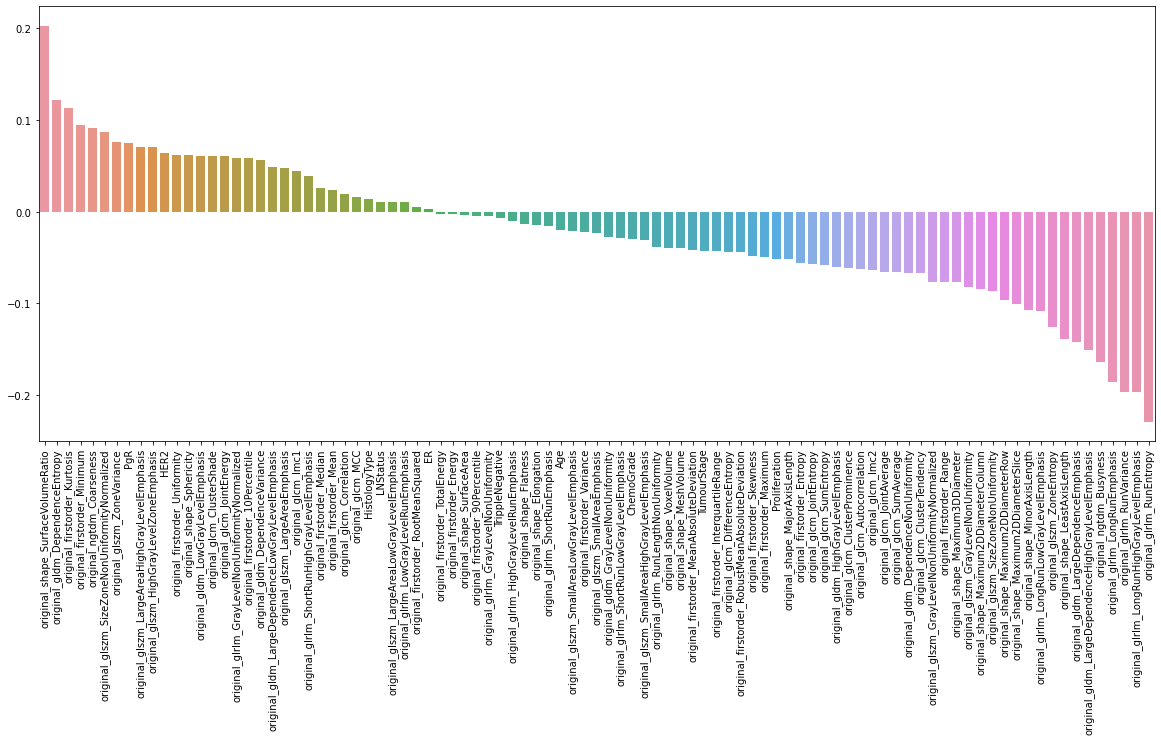

In [21]:
# correlation of features with the target variable (RFS) - Input: Numerical features Output: Numerical => Pearson correlation
corr = X_train_fs_quasi.corrwith(y_train.RFS)
corr = corr.sort_values(ascending=False)
indis = corr.index
corr = corr.values

fig, ax = plt.subplots(1, figsize=(20, 8))
sns.barplot(x=indis, y=corr, ax=ax)
plt.xticks(rotation=90)
plt.show()

In [22]:
# remove features with low correlation with the target variable (RFS) and not in categorical features

keep_columns = X_train_fs_quasi.columns[:10]

for i in range(len(corr)):
    if corr[i] < 0.05 and corr[i] > -0.05 and indis[i] not in keep_columns:
        X_train_fs_quasi.drop(indis[i], axis=1, inplace=True)
        X_test_fs_quasi.drop(indis[i], axis=1, inplace=True)

print(f'X_train_fs_quasi shape: {X_train_fs_quasi.shape}, X_test_fs_quasi shape: {X_test_fs_quasi.shape}')

X_train_fs_quasi shape: (312, 58), X_test_fs_quasi shape: (79, 58)


In [23]:
# Remove features with high correlation with each other
corr = X_train_fs_quasi.corr()
corr = corr.abs().unstack().sort_values(ascending=False).reset_index()
corr.columns = ['Feature1', 'Feature2', 'Correlation']
corr = corr[corr['Feature1'] != corr['Feature2']]
corr = corr[corr['Correlation'] > 0.9]
corr.drop_duplicates(subset=['Feature1'], keep='first', inplace=True)

for i in corr['Feature1']:
    X_train_fs_quasi.drop(i, axis=1, inplace=True)
    X_test_fs_quasi.drop(i, axis=1, inplace=True)

print(f'X_train_fs_quasi shape: {X_train_fs_quasi.shape}, X_test_fs_quasi shape: {X_test_fs_quasi.shape}')

X_train_fs_quasi shape: (312, 28), X_test_fs_quasi shape: (79, 28)


## Dimensionality Reduction methods

In [47]:
# Data standardization for selected features
sc_fs = StandardScaler()
X_train_fs_quasi_sc = sc_fs.fit_transform(X_train_fs_quasi)
X_test_fs_quasi_sc = sc_fs.transform(X_test_fs_quasi)
print(f'X_train_fs_quasi_sc shape: {X_train_fs_quasi_sc.shape}, X_test_fs_quasi_sc shape: {X_test_fs_quasi_sc.shape}')

# save StandardScaler
joblib.dump(sc_fs, 'sc_fs.pkl')

X_train_fs_quasi_sc shape: (312, 28), X_test_fs_quasi_sc shape: (79, 28)


['sc_fs.pkl']

In [25]:
# PCA for dimensionality reduction after feature selection
from sklearn.decomposition import PCA
pca_fs = PCA()
X_train_fs_quasi_sc_pca = pca_fs.fit_transform(X_train_fs_quasi_sc)
X_test_fs_quasi_sc_pca = pca_fs.transform(X_test_fs_quasi_sc)
print(f'X_train_fs_quasi_sc_pca shape: {X_train_fs_quasi_sc_pca.shape}, X_test_fs_quasi_sc_pca shape: {X_test_fs_quasi_sc_pca.shape}')

X_train_fs_quasi_sc_pca shape: (312, 28), X_test_fs_quasi_sc_pca shape: (79, 28)


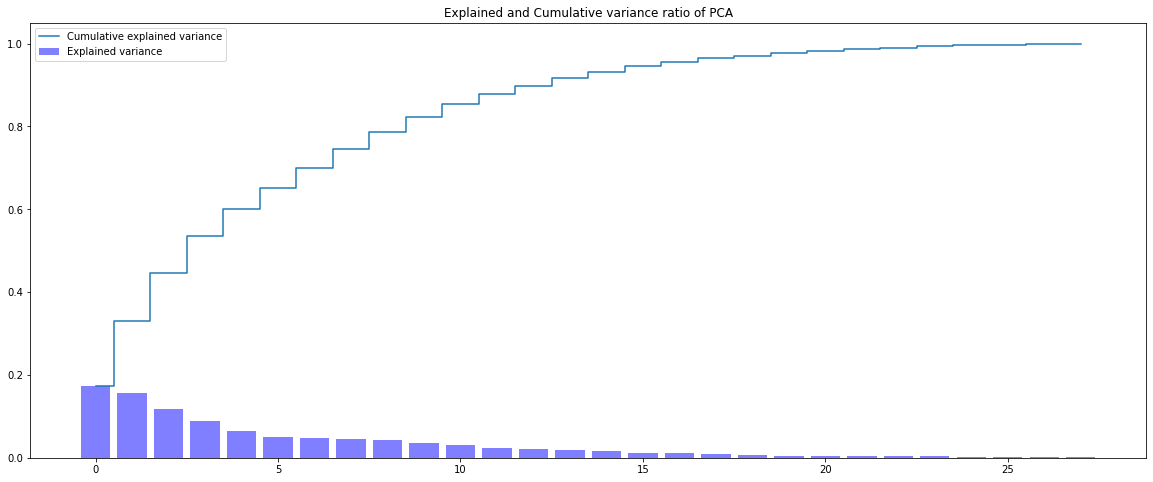

In [26]:
# plot explained variance ratio of PCA
explained_variance = pca_fs.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
fig, ax = plt.subplots(1, figsize=(20, 8))
plt.title('Explained and Cumulative variance ratio of PCA')
plt.bar(np.arange(0, len(explained_variance)), explained_variance, color='blue', alpha=0.5, align='center', label='individual explained variance')
plt.step(np.arange(0, len(cumulative_explained_variance)), cumulative_explained_variance, where='mid', label='cumulative explained variance')
plt.legend(['Cumulative explained variance', 'Explained variance'])
plt.show()

In [27]:
# PCA for dimensionality reduction before feature selection
pca = PCA()
X_train_sc_pca = pca.fit_transform(X_train_sc)
X_test_sc_pca = pca.transform(X_test_sc)
print(f'X_train_sc_pca shape: {X_train_sc_pca.shape}, X_test_sc_pca shape: {X_test_sc_pca.shape}')

X_train_sc_pca shape: (312, 117), X_test_sc_pca shape: (79, 117)


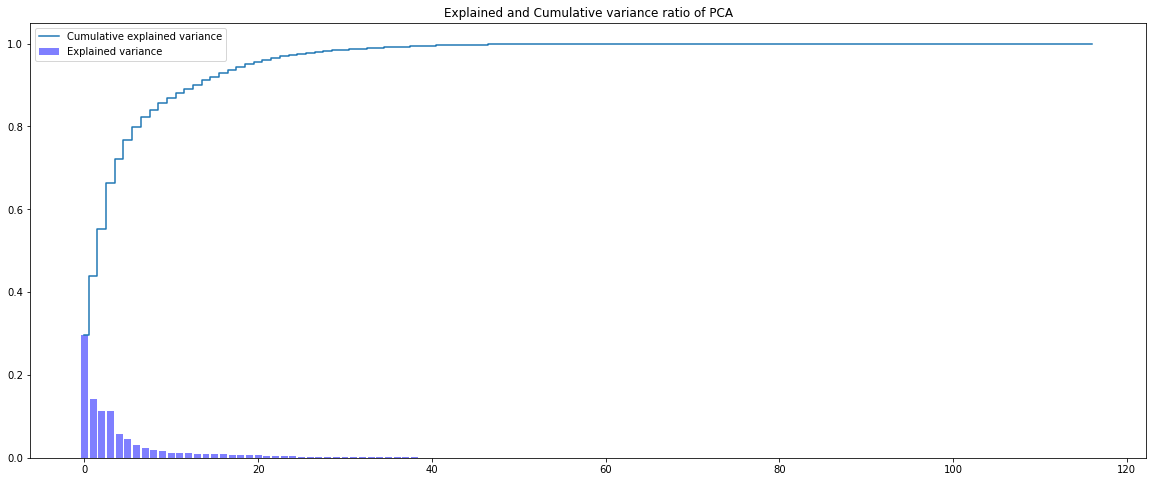

In [28]:
# plot explained variance ratio of PCA
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
fig, ax = plt.subplots(1, figsize=(20, 8))
plt.title('Explained and Cumulative variance ratio of PCA')
plt.bar(np.arange(0, len(explained_variance)), explained_variance, color='blue', alpha=0.5, align='center', label='individual explained variance')
plt.step(np.arange(0, len(cumulative_explained_variance)), cumulative_explained_variance, where='mid', label='cumulative explained variance')
plt.legend(['Cumulative explained variance', 'Explained variance'])
plt.show()

## Training

In [29]:
# Available Data
pca_trunc_features = 10
selected_columns = X_train_fs_quasi.columns
X_train_fs_quasi_sc = np.array(X_train_fs_quasi_sc)
X_test_fs_quasi_sc = np.array(X_test_fs_quasi_sc)

X_train_sc_pca = np.array(X_train_sc_pca)
X_test_sc_pca = np.array(X_test_sc_pca)

X_train_sc_pca_trunc = X_train_sc_pca[:, :pca_trunc_features]
X_test_sc_pca_trunc = X_test_sc_pca[:, :pca_trunc_features]


In [45]:
selected_columns = X_train_fs_quasi.columns.tolist()
# dump selected columns to a file
with open('selected_columns.txt', 'w') as f:
    for item in selected_columns:
        f.write("%s" % item)
        f.write("\n")


In [257]:
# SVM with Grid Search for the complete dataset
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.5, 0.1, 0.01, 0.001, 0.0001]},
                {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4, 5], 'gamma': [0.5, 0.1, 0.01, 0.001, 0.0001]}]
grid_search = GridSearchCV(estimator=SVC(), param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1, verbose=3)
grid_search = grid_search.fit(X_train_sc, y_train.PCR)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(f'Cross Validation Best Accuracy: {best_accuracy:.2f}')
print(f'Best Parameters: {best_parameters}')
grid_predictions = grid_search.predict(X_test_sc)
print(f'Accuracy of SVM classifier on training set: {grid_search.score(X_train_sc, y_train.PCR):.2f}')
print(f'Accuracy of SVM classifier on test set: {grid_search.score(X_test_sc, y_test.PCR):.2f}')
print(classification_report(y_test.PCR, grid_predictions))
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='rank_test_score')


Fitting 5 folds for each of 104 candidates, totalling 520 fits
Cross Validation Best Accuracy: 0.74
Best Parameters: {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 0.84
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91        66
         1.0       0.00      0.00      0.00        13

    accuracy                           0.84        79
   macro avg       0.42      0.50      0.46        79
weighted avg       0.70      0.84      0.76        79



/Users/rezachi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezachi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezachi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [277]:
# SVM with Grid Search for the PCA dataset with first 10 components
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.5, 0.1, 0.01, 0.001, 0.0001]}]
                # {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4, 5], 'gamma': [0.5, 0.1, 0.01, 0.001, 0.0001]}]
grid_search = GridSearchCV(estimator=SVC(), param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1, verbose=3)
grid_search = grid_search.fit(X_train_sc_pca_trunc, y_train.PCR)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(f'Cross Validation Best Accuracy: {best_accuracy:.2f}')
print(f'Best Parameters: {best_parameters}')
grid_predictions = grid_search.predict(X_test_sc_pca_trunc)
print(f'Accuracy of SVM classifier on training set: {grid_search.score(X_train_sc_pca_trunc, y_train.PCR):.2f}')
print(f'Accuracy of SVM classifier on test set: {grid_search.score(X_test_sc_pca_trunc, y_test.PCR):.2f}')
print(classification_report(y_test.PCR, grid_predictions))
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='rank_test_score')


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Cross Validation Best Accuracy: 0.74
Best Parameters: {'C': 1, 'kernel': 'linear'}
Accuracy of SVM classifier on training set: 0.74
Accuracy of SVM classifier on test set: 0.84
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91        66
         1.0       0.00      0.00      0.00        13

    accuracy                           0.84        79
   macro avg       0.42      0.50      0.46        79
weighted avg       0.70      0.84      0.76        79



/Users/rezachi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezachi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezachi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [261]:
# SVM with Grid Search for the feature selection dataset
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.5, 0.1, 0.01, 0.001, 0.0001]},
                {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4, 5], 'gamma': [0.5, 0.1, 0.01, 0.001, 0.0001]}]
grid_search = GridSearchCV(estimator=SVC(), param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1, verbose=3)
grid_search = grid_search.fit(X_train_fs_quasi_sc, y_train.PCR)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(f'Cross Validation Best Accuracy: {best_accuracy:.2f}')
print(f'Best Parameters: {best_parameters}')
grid_predictions = grid_search.predict(X_test_fs_quasi_sc)
print(f'Accuracy of SVM classifier on training set: {grid_search.score(X_train_fs_quasi_sc, y_train.PCR):.2f}')
print(f'Accuracy of SVM classifier on test set: {grid_search.score(X_test_fs_quasi_sc, y_test.PCR):.2f}')
print(classification_report(y_test.PCR, grid_predictions))
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='rank_test_score')

Fitting 5 folds for each of 104 candidates, totalling 520 fits
Cross Validation Best Accuracy: 0.74
Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy of SVM classifier on training set: 0.74
Accuracy of SVM classifier on test set: 0.84
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91        66
         1.0       0.00      0.00      0.00        13

    accuracy                           0.84        79
   macro avg       0.42      0.50      0.46        79
weighted avg       0.70      0.84      0.76        79



/Users/rezachi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezachi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezachi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [262]:
# SVR with Grid Search for the complete dataset
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.5, 0.1, 0.01, 0.001, 0.0001]},
                {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4, 5], 'gamma': [0.5, 0.1, 0.01, 0.001, 0.0001]}]
grid_search = GridSearchCV(estimator=SVR(), param_grid=parameters, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose=3)
grid_search = grid_search.fit(X_train_sc, y_train.RFS)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(f'Cross Validation Best Accuracy: {best_accuracy:.2f}')
print(f'Best Parameters: {best_parameters}')
grid_predictions = grid_search.predict(X_test_sc)
print(f'Accuracy of SVR classifier on training set: {grid_search.score(X_train_sc, y_train.RFS):.2f}')
print(f'Accuracy of SVR classifier on test set: {grid_search.score(X_test_sc, y_test.RFS):.2f}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test.RFS, grid_predictions):.2f}')
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='rank_test_score')

Fitting 5 folds for each of 104 candidates, totalling 520 fits
Cross Validation Best Accuracy: -19.91
Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy of SVR classifier on training set: -0.12
Accuracy of SVR classifier on test set: -24.44
Mean Absolute Error: 24.44


In [279]:
# SVR with Grid Search for the PCA dataset with first 10 components
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.5, 0.1, 0.01, 0.001, 0.0001]}]
                # {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4, 5], 'gamma': [0.5, 0.1, 0.01, 0.001, 0.0001]}]
grid_search = GridSearchCV(estimator=SVR(), param_grid=parameters, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose=3)
grid_search = grid_search.fit(X_train_sc_pca_trunc, y_train.RFS)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(f'Cross Validation Best Accuracy: {best_accuracy:.2f}')
print(f'Best Parameters: {best_parameters}')
grid_predictions = grid_search.predict(X_test_sc_pca_trunc)
print(f'Accuracy of SVR classifier on training set: {grid_search.score(X_train_sc_pca_trunc, y_train.RFS):.2f}')
print(f'Accuracy of SVR classifier on test set: {grid_search.score(X_test_sc_pca_trunc, y_test.RFS):.2f}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test.RFS, grid_predictions):.2f}')
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='rank_test_score')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Cross Validation Best Accuracy: -20.01
Best Parameters: {'C': 100, 'gamma': 0.5, 'kernel': 'rbf'}
Accuracy of SVR classifier on training set: -0.10
Accuracy of SVR classifier on test set: -24.21
Mean Absolute Error: 24.21


In [264]:
# SVR with Grid Search for the feature selection dataset
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.5, 0.1, 0.01, 0.001, 0.0001]},
                {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4, 5], 'gamma': [0.5, 0.1, 0.01, 0.001, 0.0001]}]
grid_search = GridSearchCV(estimator=SVR(), param_grid=parameters, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose=3)
grid_search = grid_search.fit(X_train_fs_quasi_sc, y_train.RFS)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(f'Cross Validation Best Accuracy: {best_accuracy:.2f}')
print(f'Best Parameters: {best_parameters}')
grid_predictions = grid_search.predict(X_test_fs_quasi_sc)
print(f'Accuracy of SVR classifier on training set: {grid_search.score(X_train_fs_quasi_sc, y_train.RFS):.2f}')
print(f'Accuracy of SVR classifier on test set: {grid_search.score(X_test_fs_quasi_sc, y_test.RFS):.2f}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test.RFS, grid_predictions):.2f}')
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='rank_test_score')

Fitting 5 folds for each of 104 candidates, totalling 520 fits
Cross Validation Best Accuracy: -20.01
Best Parameters: {'C': 100, 'gamma': 0.5, 'kernel': 'rbf'}
Accuracy of SVR classifier on training set: -0.10
Accuracy of SVR classifier on test set: -23.65
Mean Absolute Error: 23.65


In [280]:
# Logistic Regression with Grid Search for the complete dataset
from sklearn.linear_model import LogisticRegression
parameters = [{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['liblinear']},
                {'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']}]
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1, verbose=3)
grid_search = grid_search.fit(X_train_sc, y_train.PCR)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(f'Cross Validation Best Accuracy: {best_accuracy:.2f}')
print(f'Best Parameters: {best_parameters}')
grid_predictions = grid_search.predict(X_test_sc)
print(f'Accuracy of Logistic Regression classifier on training set: {grid_search.score(X_train_sc, y_train.PCR):.2f}')
print(f'Accuracy of Logistic Regression classifier on test set: {grid_search.score(X_test_sc, y_test.PCR):.2f}')
print(classification_report(y_test.PCR, grid_predictions))
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='rank_test_score')


Fitting 5 folds for each of 42 candidates, totalling 210 fits
Cross Validation Best Accuracy: 0.74
Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy of SVM classifier on training set: 0.76
Accuracy of SVM classifier on test set: 0.82
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90        66
         1.0       0.40      0.15      0.22        13

    accuracy                           0.82        79
   macro avg       0.63      0.55      0.56        79
weighted avg       0.78      0.82      0.79        79



In [281]:
# Logistic Regression with Grid Search for the PCA dataset with first 10 components
parameters = [{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['liblinear']},
                {'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']}]
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1, verbose=3)
grid_search = grid_search.fit(X_train_sc_pca_trunc, y_train.PCR)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(f'Cross Validation Best Accuracy: {best_accuracy:.2f}')
print(f'Best Parameters: {best_parameters}')
grid_predictions = grid_search.predict(X_test_sc_pca_trunc)
print(f'Accuracy of Logistic Regression classifier on training set: {grid_search.score(X_train_sc_pca_trunc, y_train.PCR):.2f}')
print(f'Accuracy of Logistic Regression classifier on test set: {grid_search.score(X_test_sc_pca_trunc, y_test.PCR):.2f}')
print(classification_report(y_test.PCR, grid_predictions))
results = pd.DataFrame(grid_search.cv_results_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Cross Validation Best Accuracy: 0.74
Best Parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy of SVM classifier on training set: 0.74
Accuracy of SVM classifier on test set: 0.84
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91        66
         1.0       0.00      0.00      0.00        13

    accuracy                           0.84        79
   macro avg       0.42      0.50      0.46        79
weighted avg       0.70      0.84      0.76        79



/Users/rezachi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezachi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezachi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [282]:
# Logistic Regression with Grid Search for the feature selection dataset
parameters = [{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['liblinear']},
                {'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']}]
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1, verbose=3)
grid_search = grid_search.fit(X_train_fs_quasi_sc, y_train.PCR)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(f'Cross Validation Best Accuracy: {best_accuracy:.2f}')
print(f'Best Parameters: {best_parameters}')
grid_predictions = grid_search.predict(X_test_fs_quasi_sc)
print(f'Accuracy of Logistic Regression classifier on training set: {grid_search.score(X_train_fs_quasi_sc, y_train.PCR):.2f}')
print(f'Accuracy of Logistic Regression classifier on test set: {grid_search.score(X_test_fs_quasi_sc, y_test.PCR):.2f}')
print(classification_report(y_test.PCR, grid_predictions))
results = pd.DataFrame(grid_search.cv_results_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Cross Validation Best Accuracy: 0.74
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy of SVM classifier on training set: 0.79
Accuracy of SVM classifier on test set: 0.81
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89        66
         1.0       0.42      0.38      0.40        13

    accuracy                           0.81        79
   macro avg       0.65      0.64      0.64        79
weighted avg       0.80      0.81      0.81        79



In [285]:
# Linear Regression with Grid Search for the complete dataset
from sklearn.linear_model import LinearRegression
parameters = [{'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]}]
grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=parameters, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose=3)
grid_search = grid_search.fit(X_train_sc, y_train.RFS)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(f'Cross Validation Best Accuracy: {best_accuracy:.2f}')
print(f'Best Parameters: {best_parameters}')
grid_predictions = grid_search.predict(X_test_sc)
print(f'Accuracy of SVR classifier on training set: {grid_search.score(X_train_sc, y_train.RFS):.2f}')
print(f'Accuracy of SVR classifier on test set: {grid_search.score(X_test_sc, y_test.RFS):.2f}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test.RFS, grid_predictions):.2f}')
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='rank_test_score')


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Cross Validation Best Accuracy: -231.30
Best Parameters: {'copy_X': True, 'fit_intercept': False, 'normalize': True}
Accuracy of SVR classifier on training set: -54.54
Accuracy of SVR classifier on test set: -121.75
Mean Absolute Error: 121.75


In [286]:
# Decision Tree with Grid Search for the complete dataset
from sklearn.tree import DecisionTreeClassifier
parameters = [{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [None, 'auto', 'sqrt', 'log2']}]
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1, verbose=3)
grid_search = grid_search.fit(X_train_sc, y_train.PCR)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(f'Cross Validation Best Accuracy: {best_accuracy:.2f}')
print(f'Best Parameters: {best_parameters}')
grid_predictions = grid_search.predict(X_test_sc)
print(f'Accuracy of Decision Tree classifier on training set: {grid_search.score(X_train_sc, y_train.PCR):.2f}')
print(f'Accuracy of Decision Tree classifier on test set: {grid_search.score(X_test_sc, y_test.PCR):.2f}')
print(classification_report(y_test.PCR, grid_predictions))
results = pd.DataFrame(grid_search.cv_results_)


Fitting 5 folds for each of 15840 candidates, totalling 79200 fits
Cross Validation Best Accuracy: 0.76
Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'random'}
Accuracy of Decision Tree classifier on training set: 0.75
Accuracy of Decision Tree classifier on test set: 0.84
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.91        66
         1.0       0.50      0.08      0.13        13

    accuracy                           0.84        79
   macro avg       0.67      0.53      0.52        79
weighted avg       0.79      0.84      0.78        79



In [287]:
# Decision Tree with Grid Search for PCA dataset with first 10 components
parameters = [{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [None, 'auto', 'sqrt', 'log2']}]
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1, verbose=3)
grid_search = grid_search.fit(X_train_sc_pca, y_train.PCR)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(f'Cross Validation Best Accuracy: {best_accuracy:.2f}')
print(f'Best Parameters: {best_parameters}')
grid_predictions = grid_search.predict(X_test_sc_pca)
print(f'Accuracy of Decision Tree classifier on training set: {grid_search.score(X_train_sc_pca, y_train.PCR):.2f}')
print(f'Accuracy of Decision Tree classifier on test set: {grid_search.score(X_test_sc_pca, y_test.PCR):.2f}')
print(classification_report(y_test.PCR, grid_predictions))
results = pd.DataFrame(grid_search.cv_results_)

Fitting 5 folds for each of 15840 candidates, totalling 79200 fits
Cross Validation Best Accuracy: 0.75
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 9, 'splitter': 'random'}
Accuracy of Decision Tree classifier on training set: 0.74
Accuracy of Decision Tree classifier on test set: 0.84
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91        66
         1.0       0.00      0.00      0.00        13

    accuracy                           0.84        79
   macro avg       0.42      0.50      0.46        79
weighted avg       0.70      0.84      0.76        79



/Users/rezachi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezachi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezachi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [288]:
# Decision Tree with Grid Search for the feature selected dataset
parameters = [{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [None, 'auto', 'sqrt', 'log2']}]
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1, verbose=3)
grid_search = grid_search.fit(X_train_fs_quasi_sc, y_train.PCR)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(f'Cross Validation Best Accuracy: {best_accuracy:.2f}')
print(f'Best Parameters: {best_parameters}')
grid_predictions = grid_search.predict(X_test_fs_quasi_sc)
print(f'Accuracy of Decision Tree classifier on training set: {grid_search.score(X_train_fs_quasi_sc, y_train.PCR):.2f}')
print(f'Accuracy of Decision Tree classifier on test set: {grid_search.score(X_test_fs_quasi_sc, y_test.PCR):.2f}')
print(classification_report(y_test.PCR, grid_predictions))
results = pd.DataFrame(grid_search.cv_results_)

Fitting 5 folds for each of 15840 candidates, totalling 79200 fits
Cross Validation Best Accuracy: 0.76
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 6, 'min_samples_split': 6, 'splitter': 'random'}
Accuracy of Decision Tree classifier on training set: 0.76
Accuracy of Decision Tree classifier on test set: 0.78
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87        66
         1.0       0.30      0.23      0.26        13

    accuracy                           0.78        79
   macro avg       0.58      0.56      0.57        79
weighted avg       0.76      0.78      0.77        79



In [289]:
# Decision Tree regression with Grid Search for the complete dataset
from sklearn.tree import DecisionTreeRegressor
parameters = [{'criterion': ['mse', 'friedman_mse', 'mae'], 'splitter': ['best', 'random'], 'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [None, 'auto', 'sqrt', 'log2']}]
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=parameters, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose=3)
grid_search = grid_search.fit(X_train_sc, y_train.RFS)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(f'Cross Validation Best Accuracy: {best_accuracy:.2f}')
print(f'Best Parameters: {best_parameters}')
grid_predictions = grid_search.predict(X_test_sc)
print(f'Accuracy of Decision Tree Regressor on training set: {grid_search.score(X_train_sc, y_train.RFS):.2f}')
print(f'Accuracy of Decision Tree Regressor on test set: {grid_search.score(X_test_sc, y_test.RFS):.2f}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test.RFS, grid_predictions):.2f}')
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='rank_test_score')

Fitting 5 folds for each of 23760 candidates, totalling 118800 fits
Cross Validation Best Accuracy: -19.40
Best Parameters: {'criterion': 'mse', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
Accuracy of Decision Tree classifier on training set: -19.68
Accuracy of Decision Tree classifier on test set: -23.77
Mean Absolute Error: 23.77


In [290]:
# Decision Tree regression with Grid Search for PCA dataset with first 10 components
parameters = [{'criterion': ['mse', 'friedman_mse', 'mae'], 'splitter': ['best', 'random'], 'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [None, 'auto', 'sqrt', 'log2']}]
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=parameters, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose=3)
grid_search = grid_search.fit(X_train_sc_pca, y_train.RFS)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(f'Cross Validation Best Accuracy: {best_accuracy:.2f}')
print(f'Best Parameters: {best_parameters}')
grid_predictions = grid_search.predict(X_test_sc_pca)
print(f'Accuracy of Decision Tree Regressor on training set: {grid_search.score(X_train_sc_pca, y_train.RFS):.2f}')
print(f'Accuracy of Decision Tree Regressor on test set: {grid_search.score(X_test_sc_pca, y_test.RFS):.2f}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test.RFS, grid_predictions):.2f}')
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='rank_test_score')

Fitting 5 folds for each of 23760 candidates, totalling 118800 fits
Cross Validation Best Accuracy: -19.48
Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 9, 'splitter': 'random'}
Accuracy of Decision Tree Regressor on training set: -19.62
Accuracy of Decision Tree Regressor on test set: -24.91
Mean Absolute Error: 24.91


In [291]:
# Decision Tree regression with Grid Search for the feature selected dataset
parameters = [{'criterion': ['mse', 'friedman_mse', 'mae'], 'splitter': ['best', 'random'], 'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [None, 'auto', 'sqrt', 'log2']}]
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=parameters, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose=3)
grid_search = grid_search.fit(X_train_fs_quasi_sc, y_train.RFS)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(f'Cross Validation Best Accuracy: {best_accuracy:.2f}')
print(f'Best Parameters: {best_parameters}')
grid_predictions = grid_search.predict(X_test_fs_quasi_sc)
print(f'Accuracy of Decision Tree Regressor on training set: {grid_search.score(X_train_fs_quasi_sc, y_train.RFS):.2f}')
print(f'Accuracy of Decision Tree Regressor on test set: {grid_search.score(X_test_fs_quasi_sc, y_test.RFS):.2f}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test.RFS, grid_predictions):.2f}')
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='rank_test_score')

Fitting 5 folds for each of 23760 candidates, totalling 118800 fits
Cross Validation Best Accuracy: -19.33
Best Parameters: {'criterion': 'mse', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 7, 'splitter': 'random'}
Accuracy of Decision Tree Regressor on training set: -17.97
Accuracy of Decision Tree Regressor on test set: -21.27
Mean Absolute Error: 21.27


In [296]:
# Neural Network for classification
def create_classification_model(X_train):
    model = Sequential()
    model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [297]:
# Neural Network for regression
def create_regression_model(X_train):
    model = Sequential()
    model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
    return model


In [301]:
# Classification with complete dataset
model = create_classification_model(X_train_sc)
model.fit(X_train_sc, y_train.PCR, epochs=100, batch_size=10, verbose=0)
_, accuracy = model.evaluate(X_train_sc, y_train.PCR, verbose=0)
print(f'Accuracy of Neural Network on training set: {accuracy:.2f}')
_, accuracy = model.evaluate(X_test_sc, y_test.PCR, verbose=0)
print(f'Accuracy of Neural Network on test set: {accuracy:.2f}')
predictions = model.predict(X_test_sc)
predictions = [round(x[0]) for x in predictions]
print(f'Accuracy of Neural Network on test set: {accuracy_score(y_test.PCR, predictions):.2f}')


Accuracy of Neural Network on training set: 0.99
Accuracy of Neural Network on test set: 0.77
Accuracy of Neural Network on test set: 0.77


In [302]:
# Classification with PCA dataset with first 10 components
model = create_classification_model(X_train_sc_pca)
model.fit(X_train_sc_pca, y_train.PCR, epochs=100, batch_size=10, verbose=0)
_, accuracy = model.evaluate(X_train_sc_pca, y_train.PCR, verbose=0)
print(f'Accuracy of Neural Network on training set: {accuracy:.2f}')
_, accuracy = model.evaluate(X_test_sc_pca, y_test.PCR, verbose=0)
print(f'Accuracy of Neural Network on test set: {accuracy:.2f}')
predictions = model.predict(X_test_sc_pca)
predictions = [round(x[0]) for x in predictions]
print(f'Accuracy of Neural Network on test set: {accuracy_score(y_test.PCR, predictions):.2f}')

Accuracy of Neural Network on training set: 0.99
Accuracy of Neural Network on test set: 0.77
Accuracy of Neural Network on test set: 0.77


In [304]:
# Classification with feature selected dataset
model = create_classification_model(X_train_fs_quasi_sc)
model.fit(X_train_fs_quasi_sc, y_train.PCR, epochs=100, batch_size=10, verbose=0)
_, accuracy = model.evaluate(X_train_fs_quasi_sc, y_train.PCR, verbose=0)
print(f'Accuracy of Neural Network on training set: {accuracy:.2f}')
_, accuracy = model.evaluate(X_test_fs_quasi_sc, y_test.PCR, verbose=0)
print(f'Accuracy of Neural Network on test set: {accuracy:.2f}')
predictions = model.predict(X_test_fs_quasi_sc)
predictions = [round(x[0]) for x in predictions]
print(f'Accuracy of Neural Network on test set: {accuracy_score(y_test.PCR, predictions):.2f}')

Accuracy of Neural Network on training set: 0.95
Accuracy of Neural Network on test set: 0.76
Accuracy of Neural Network on test set: 0.76


In [305]:
# Regression with complete dataset
model = create_regression_model(X_train_sc)
model.fit(X_train_sc, y_train.RFS, epochs=100, batch_size=10, verbose=0)
_, accuracy = model.evaluate(X_train_sc, y_train.RFS, verbose=0)
print(f'Accuracy of Neural Network on training set: {accuracy:.2f}')
_, accuracy = model.evaluate(X_test_sc, y_test.RFS, verbose=0)
print(f'Accuracy of Neural Network on test set: {accuracy:.2f}')
predictions = model.predict(X_test_sc)
print(f'Mean Absolute Error: {mean_absolute_error(y_test.RFS, predictions):.2f}')

Accuracy of Neural Network on training set: 14.61
Accuracy of Neural Network on test set: 27.10
Mean Absolute Error: 27.10


In [306]:
# Regression with PCA dataset with first 10 components
model = create_regression_model(X_train_sc_pca)
model.fit(X_train_sc_pca, y_train.RFS, epochs=100, batch_size=10, verbose=0)
_, accuracy = model.evaluate(X_train_sc_pca, y_train.RFS, verbose=0)
print(f'Accuracy of Neural Network on training set: {accuracy:.2f}')
_, accuracy = model.evaluate(X_test_sc_pca, y_test.RFS, verbose=0)
print(f'Accuracy of Neural Network on test set: {accuracy:.2f}')
predictions = model.predict(X_test_sc_pca)
print(f'Mean Absolute Error: {mean_absolute_error(y_test.RFS, predictions):.2f}')

Accuracy of Neural Network on training set: 12.82
Accuracy of Neural Network on test set: 36.99
Mean Absolute Error: 36.99


In [307]:
# Regression with feature selected dataset
model = create_regression_model(X_train_fs_quasi_sc)
model.fit(X_train_fs_quasi_sc, y_train.RFS, epochs=100, batch_size=10, verbose=0)
_, accuracy = model.evaluate(X_train_fs_quasi_sc, y_train.RFS, verbose=0)
print(f'Accuracy of Neural Network on training set: {accuracy:.2f}')
_, accuracy = model.evaluate(X_test_fs_quasi_sc, y_test.RFS, verbose=0)
print(f'Accuracy of Neural Network on test set: {accuracy:.2f}')
predictions = model.predict(X_test_fs_quasi_sc)
print(f'Mean Absolute Error: {mean_absolute_error(y_test.RFS, predictions):.2f}')

Accuracy of Neural Network on training set: 16.83
Accuracy of Neural Network on test set: 29.96
Mean Absolute Error: 29.96


## BEST MODELS

### CLASSIFICATION

In [32]:
# Make the best model for classification
svm = SVC(C=1, gamma=0.01, kernel='rbf')
svm.fit(X_train_fs_quasi_sc, y_train.PCR)
predictions = svm.predict(X_test_fs_quasi_sc)
print(f'Accuracy of SVM on test set: {accuracy_score(y_test.PCR, predictions):.2f}')

# Saving the model
joblib.dump(svm, 'svm_model.pkl')

Accuracy of SVM on test set: 0.84


['svm_model.pkl']

In [35]:
# Make the best model for regression
tree = DecisionTreeRegressor(criterion='mse', max_depth=8, max_features='log2', min_samples_leaf=5, min_samples_split=7, splitter='random')
tree.fit(X_train_fs_quasi_sc, y_train.RFS)
predictions = tree.predict(X_test_fs_quasi_sc)
print(f'Mean Absolute Error: {mean_absolute_error(y_test.RFS, predictions):.2f}')

# Saving the model
joblib.dump(tree, 'tree_model.pkl')

Mean Absolute Error: 23.35


['tree_model.pkl']